# Explore the climate change signal in one of the world's oldest weather stations: 

**Säkularstation Potsdam Telegraphenberg, Germany**


The secular station is the only meteorological station in the world that can show such a comprehensive measurement program without gaps over a period of more than 100 years.
It is not without reason that the founders of the observatory named and designed the associated meteorological station as a secular station (seculum = century). The concept was to have a station that would operate over very long periods of time under measurement and boundary conditions that were as unchanged as possible. This concept has been successful so far and this is mainly due to the commitment of all observers ever working at the station and last but not least to Reinhard Süring himself.

source : https://www.pik-potsdam.de/de/produkte/infothek/telegraphenberg-d/suering-haus/sakularstation/Saekularstation



In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Stations, Hourly
from datetime import datetime,date , timedelta
import numpy as np


In [2]:
# Set time period
start = datetime(1894, 1, 1)
yesterday = date.today() - timedelta(days = 1)
end = datetime(yesterday.year, yesterday.month, yesterday.day, 23, 59)

# Get the daily data for the station
# Get nearby weather stations
# The list of the climate station could be found for Germany here : https://www.dwd.de/DE/leistungen/klimadatendeutschland/stationsuebersicht.html?nn=16102&lsbId=343278

stations = Stations()
stations = stations.nearby( 52.382,13.062) # where the station is located ! 
station = stations.fetch(1) # fetch the first nearest station 

# Print DataFrame
print(station)
print(yesterday.year)

# Get hourly data
data = Hourly('10379', start, end)
data = data.fetch()

# Print DataFrame
data.head()



          name country region    wmo  icao  latitude  longitude  elevation  \
id                                                                           
10379  Potsdam      DE     BB  10379  <NA>   52.3833    13.0667       81.0   

            timezone hourly_start hourly_end daily_start  daily_end  \
id                                                                    
10379  Europe/Berlin   1893-01-01 2023-07-10  1893-01-01 2023-07-08   

      monthly_start monthly_end    distance  
id                                           
10379    1893-01-01  2022-01-01  350.221116  
2023


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
1894-01-01 00:00:00,1.5,1.1,97.0,NaN,NaN,NaN,24.1,NaN,NaN,NaN,NaN
1894-01-01 01:00:00,1.2,0.9,98.0,NaN,NaN,NaN,22.3,NaN,NaN,NaN,NaN
1894-01-01 02:00:00,0.8,0.4,97.0,NaN,NaN,NaN,20.5,NaN,NaN,NaN,NaN
1894-01-01 03:00:00,0.0,-0.6,96.0,NaN,NaN,NaN,16.2,NaN,NaN,0.0,NaN
1894-01-01 04:00:00,-0.7,-1.1,97.0,NaN,NaN,NaN,15.8,NaN,NaN,0.0,NaN


In [3]:
# Define a function to scale the plot size
def scale_plot_size(factor=1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor



## How is the hourly temperature look like?

In [4]:
# Scale the plot size by 1.5 times
scale_plot_size(1.5)

# Plot the hourly temperature 
plt.plot(data["temp"])
plt.xlabel("Year")
plt.ylabel("Air temperature (°C)")b
plt.title("Air temperature for station Potsdam Sekulärstation")
plt.show()

SyntaxError: invalid syntax (2270237075.py, line 7)

## Plot the Tropical Night (when daily minimum temperature is greater than 20°C) frequency and intensity

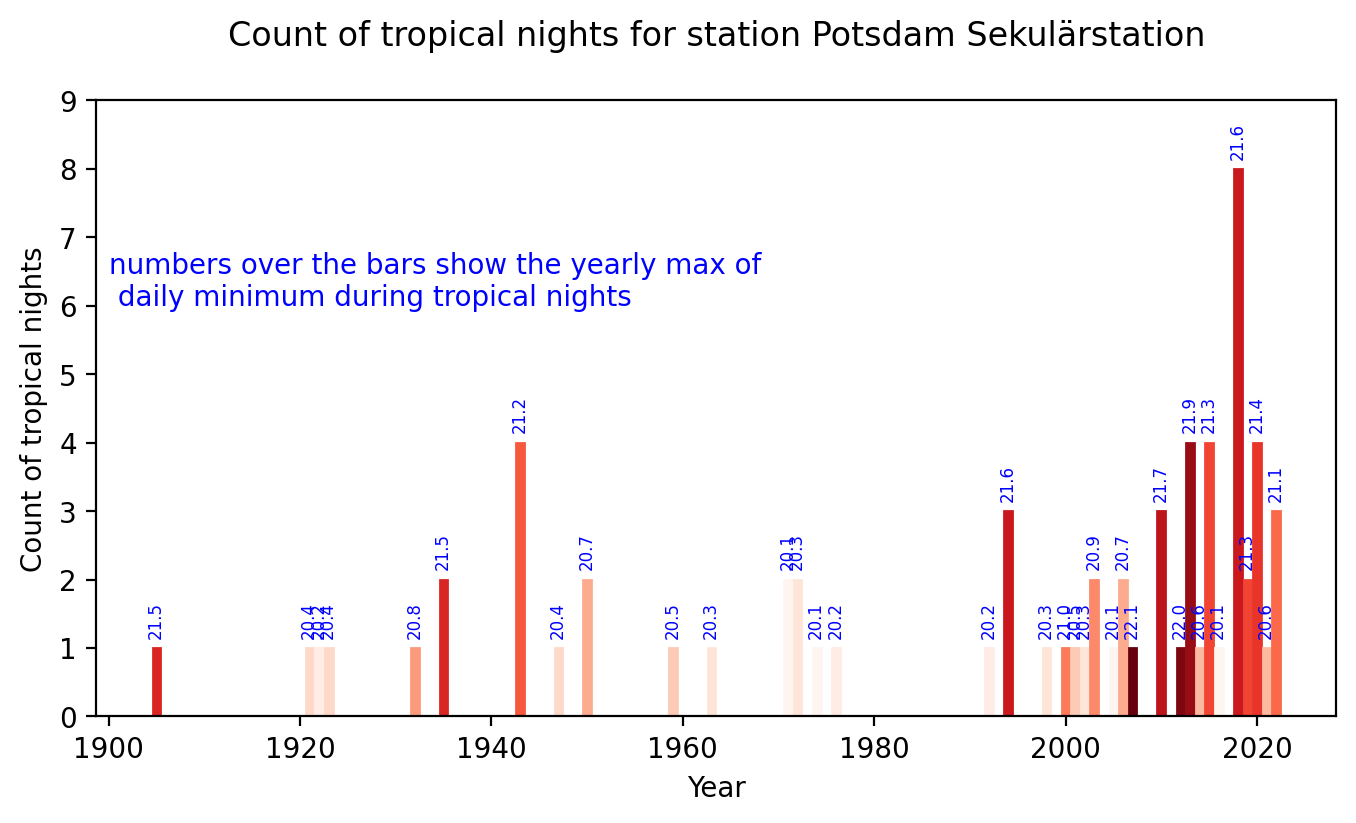

In [23]:

# Define a function to check if a night is tropical
def is_tropical(night_temp):
    return night_temp > 20
plt.figure(figsize=(8, 4), dpi=200)
scale_plot_size(1.5)
# Resample the data to get the daily minimum temperature
daily_min = data['temp'].resample('D').min()

# Apply the function to the data and create a new column
datas = daily_min.apply(is_tropical)

## Group the data by year and get the count of tropical nights for each year
yearly_tropical = datas.groupby(datas.index.year).sum()

## Group the filtered data by year and get the mean temperature for each year
yearly_mean = daily_min[daily_min>20].groupby(daily_min[daily_min>20].index.year).max()
#
N=10
bars = plt.bar(x=yearly_tropical[yearly_tropical>0].index, height=yearly_tropical[yearly_tropical>0].values, alpha=1)
kk = 0
for i in range(len(yearly_tropical.index.values)):
    if yearly_tropical.values[i] > 0:
        
        plt.text(yearly_tropical.index.values[i]-1,yearly_tropical.values[i]+.2,str(round(yearly_mean.values[kk],2)),
                  rotation=90, fontsize=6, color="blue")
        kk += 1
ym = yearly_mean[yearly_tropical>0].values
for i, b in enumerate(bars):
    b.set_color(plt.cm.Reds((ym[i]-np.min(ym))/(np.max(ym)-np.min(ym))))
plt.text(1900,6,"numbers over the bars show the yearly max of \n daily minimum during tropical nights", color='b')
plt.xlabel("Year")
plt.ylabel("Count of tropical nights")
plt.title("Count of tropical nights for station Potsdam Sekulärstation\n ")
plt.ylim([0,9])
plt.show()

In [14]:
len(yearly_tropical[yearly_tropical>0])

36

## Plot the yearly median of relative humidity (RH) in % 

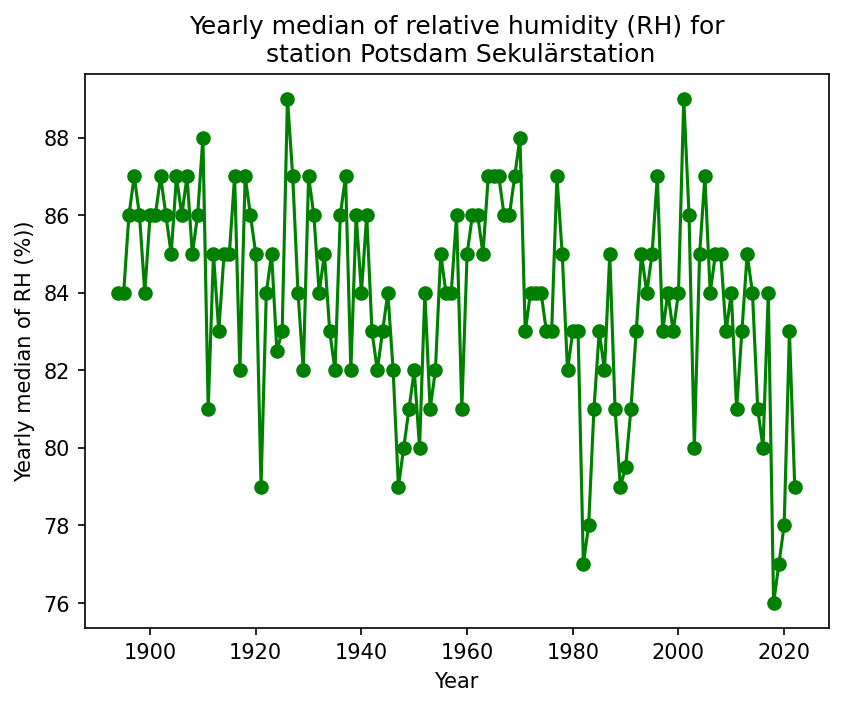

In [39]:
# Group the data by year and get the median of relative humidity for each year
yearly_median = data.groupby(data.index.year)["rhum"].median()

# Plot the yearly median of relative humidity
plt.plot(yearly_median[:-1],'g-o')# ignore this year because it is not completed!
plt.xlabel("Year")
plt.ylabel("Yearly median of RH (%))")
plt.title("Yearly median of relative humidity (RH) for\n station Potsdam Sekulärstation")
plt.show()

## Plot the temperature signals

It is pretty obvious that there exists a significant temperature rise after 80s. All those red dots are years with yearly median of temperature greater than 10 °C. 

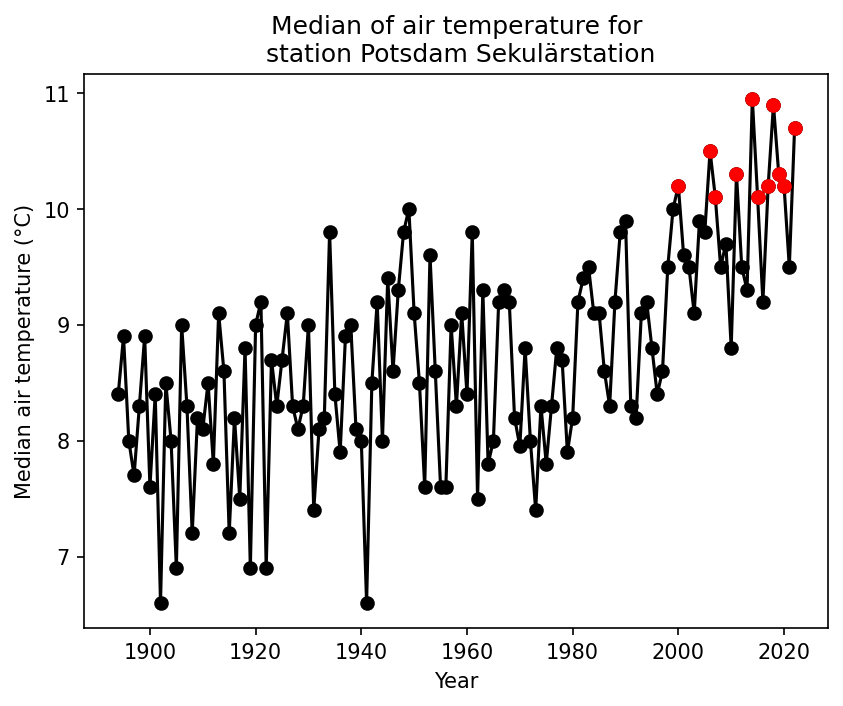

In [47]:
# Group the data by year and get the median temperature for each year
yearly_med = data.groupby(data.index.year)["temp"].median()

# Plot the yearly median temperature with different colors
plt.plot(yearly_med[:-1],'k-o') # ignore this year because it is not completed!
plt.plot(yearly_med[yearly_med>10],'ro') # ignore this year because it is not completed!
plt.xlabel("Year")
plt.ylabel("Median air temperature (°C)")
plt.title("Median of air temperature for\n station Potsdam Sekulärstation")
plt.show()

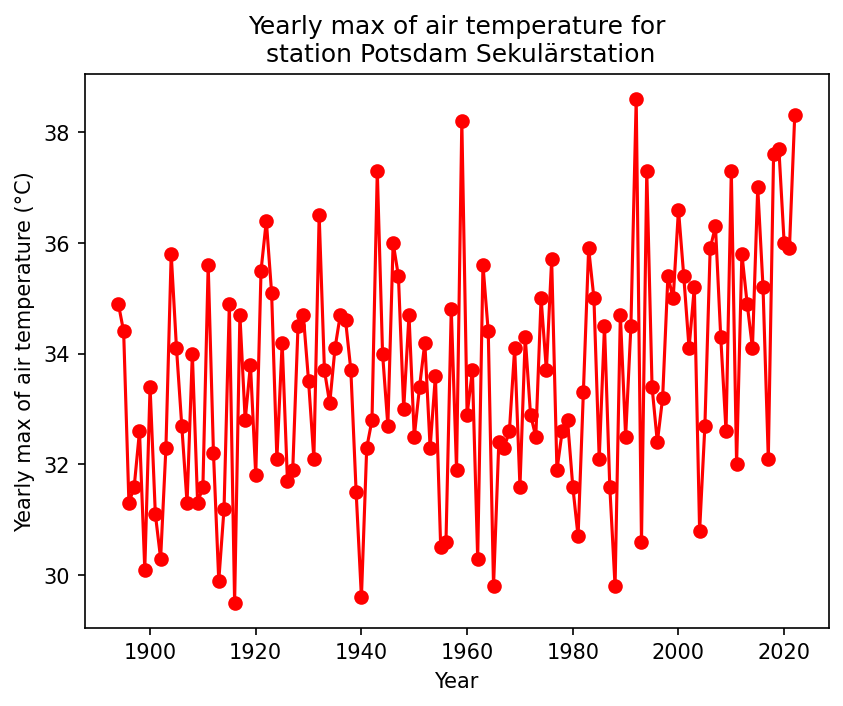

In [35]:
# Group the data by year and get the yearly maximum of temperature
yearly_max = data.groupby(data.index.year)["temp"].max()

# Plot the yearly max temperature
plt.plot(yearly_max[:-1],'r-o') # ignore this year because it is not completed!
plt.xlabel("Year")
plt.ylabel("Yearly max of air temperature (°C)")
plt.title("Yearly max of air temperature for\n station Potsdam Sekulärstation")
plt.show()

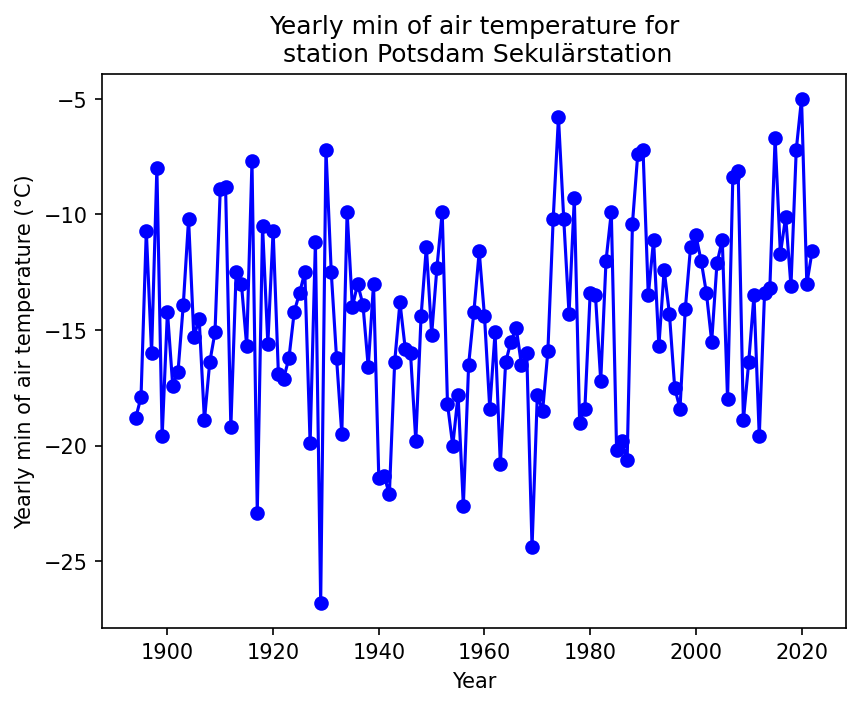

In [34]:
# Group the data by year and get the yearly minimum of temperature
yearly_min = data.groupby(data.index.year)["temp"].min()

# Plot the yearly max temperature
plt.plot(yearly_min[:-1],'b-o') # ignore this year because it is not completed!
plt.xlabel("Year")
plt.ylabel("Yearly min of air temperature (°C)")
plt.title("Yearly min of air temperature for\n station Potsdam Sekulärstation")
plt.show()

## Conclusion

- the temperature (yearly median, yearly max, yearly minimum) is increasing significantly at this station since 80s!

- number of tropical nights and their intensity is also increasing

- relative humidity is decreasing anti-correlated with the temperature increase 


## Acknowledgment

Do not forget to give a star or follow if you liked the notebook!
